<a href="https://colab.research.google.com/github/Naren8520/4-forma-de-graficar-funciones-de-densidad-continua/blob/master/Supervised_Learning_modelo_de_Regresi%C3%B3n_mediante_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning modelo de Regresión mediante  Sklearn

El aprendizaje automático es una rama de la inteligencia artificial que permite a los programas informáticos aprender y mejorar automáticamente a partir de la experiencia. Los algoritmos de aprendizaje automático aprenden de los conjuntos de datos y, luego, basándose en los patrones identificados en los conjuntos de datos, hacen predicciones sobre datos invisibles.

Los algoritmos de aprendizaje automático se pueden clasificar principalmente en dos tipos: algoritmos de aprendizaje supervisado y algoritmos de aprendizaje no supervisado.

Los algoritmos de aprendizaje automático supervisados son aquellos algoritmos en los que el conjunto de datos de entrada y la salida correspondiente o la predicción verdadera están disponibles, y los algoritmos intentan encontrar la relación entre las entradas y las salidas.

Sin embargo, en los algoritmos de aprendizaje automático no supervisados, no se conocen las verdaderas etiquetas de los resultados. Más bien, los algoritmos intentan encontrar patrones similares en los datos. Los algoritmos de agrupación en clústeres son un ejemplo típico de aprendizaje no supervisado.

Los algoritmos de aprendizaje supervisado se dividen en dos tipos: algoritmos de regresión y algoritmos de clasificación.

Los algoritmos de regresión predicen un valor continuo, por ejemplo, el precio de una casa, la presión arterial de una persona y la puntuación de un estudiante en un examen en particular. Los algoritmos de clasificación, por otro lado, predicen un valor discreto, como si un tumor es maligno o no, si un estudiante va a aprobar o reprobar un examen, etc.

En este capítulo, estudiará cómo se pueden utilizar los algoritmos de aprendizaje automático para resolver problemas de regresión, es decir, predecir un valor continuo utilizando la biblioteca Sklearn (https://bit.ly/2Zvy2Sm). En el capítulo 7, verá cómo resolver problemas de clasificación a través de Sklearn. El capítulo 8 ofrece una descripción general del algoritmo de aprendizaje no supervisado.

## **1. Preparación de datos para problemas de regresión.**

Los algoritmos de aprendizaje automático requieren que los datos estén en un formato determinado antes de que los algoritmos puedan entrenarse con los datos. En esta sección, verá varios pasos de preprocesamiento de datos que debe realizar antes de poder entrenar algoritmos de aprendizaje automático utilizando la biblioteca `Sklearn`.

Puede leer datos de archivos CSV. Sin embargo, los conjuntos de datos que vamos a utilizar en esta sección están disponibles de forma predeterminada en la biblioteca de `Seaborn`. Para ver todos los conjuntos de datos, puede usar la función `get_dataset_names ()` como se muestra en el siguiente script:


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.get_dataset_names()

Para leer un conjunto de datos en particular en el marco de datos de Pandas, pase el nombre del conjunto de datos al método load_dataset () de la biblioteca Seaborn.

La siguiente secuencia de comandos carga el conjunto de datos Tips y muestra sus primeras cinco filas.

In [ ]:
tips_df = sns.load_dataset("tips")
tips_df.head()

En este capítulo, trabajaremos con el conjunto de datos Tips. Usaremos algoritmos de aprendizaje automático para predecir la "propina" de un registro en particular, en función de las características restantes, como "factura_total", "sexo", "día", "hora", etc.

### **1.1  División de datos en funciones y etiquetas**

Como primer paso, dividimos los datos en conjuntos de características y etiquetas. Nuestro conjunto de etiquetas consta de valores de la columna "propina", mientras que el conjunto de características consta de valores de las columnas restantes. El siguiente script divide los datos en conjuntos de características y etiquetas.

In [ ]:
X = tips_df.drop(["tip"], axis=1)
y = tips_df["tip"]

Imprimamos el conjunto de funciones.

In [ ]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


Y el siguiente script imprime el conjunto de etiquetas.

In [ ]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

### **1.2. Conversión de datos categóricos en números**

Los algoritmos de aprendizaje automático, en su mayor parte, solo pueden funcionar con números. Por lo tanto, es importante convertir los datos categóricos a un formato numérico.

En este sentido, el primer paso es crear un conjunto de datos de todos los valores numéricos. Para hacerlo, elimine las columnas categóricas del conjunto de datos, como se muestra a continuación.

In [ ]:
numerical = X.drop(["sex" , "smoker" , "day" , "time" ], axis = 1)

El resultado a continuación muestra que el marco de datos "numérico" contiene sólo columnas numéricas.

In [ ]:
numerical.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


A continuación, debe crear un marco de datos que contenga solo columnas categóricas.

In [ ]:
categorical = X.filter(["sex" , "smoker" , "day" , "time" ])
categorical.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


Uno de los enfoques más comunes para convertir una columna categórica en una numérica es mediante la codificación one-hot. En la codificación one-hot, para cada valor único en las columnas originales, se crea una nueva columna. Por ejemplo, para el sexo, se crean dos columnas: Femenino y Masculino. Si la columna de sexo original contenía hombre, se agrega un 1 en la columna Hombre recién creada, mientras que se agrega 1 en la columna recién creada.
Columna Mujer si la columna de sexo original contenía Mujer.

Sin embargo, se puede observar que realmente no necesitamos dos columnas. Una sola columna, es decir, Mujer es suficiente, ya que cuando un cliente es mujer, podemos agregar 1 en la columna Mujer, de lo contrario, se puede agregar 1 en esa columna. Por lo tanto, necesitamos N-1 columnas codificadas en caliente para todos los N valores en la columna original.

El siguiente script convierte columnas categóricas en columnas codificadas en un solo uso utilizando el método `pd.get_dummies ()`.

In [ ]:
import pandas as pd
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1,1,0,0,1,1
1,0,1,0,0,1,1
2,0,1,0,0,1,1
3,0,1,0,0,1,1
4,1,1,0,0,1,1


The output shows the newly created one-hot encoded columns.

El paso final es unir las columnas numéricas con las columnas codificadas en caliente. Para hacerlo, puede usar la función `concat ()` de la biblioteca Pandas como se muestra a continuación:

In [ ]:
X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


### **1.3. Divida los datos en conjuntos de prueba y entrenamiento**

Después de entrenar un algoritmo de aprendizaje automático, debe evaluarlo para ver qué tan bien funciona con datos invisibles. Por lo tanto, dividimos el conjunto de datos en dos conjuntos, es decir, un conjunto de entrenamiento y un conjunto de prueba. El conjunto de datos se entrena a través del conjunto de entrenamiento y se evalúa en el conjunto de prueba. Para dividir los datos en conjuntos de entrenamiento y prueba, puede usar la función `train_test_split ()` de la biblioteca Sklearn, como se muestra a continuación. El seguimiento El script divide los datos en un conjunto de entrenamiento del 80 por ciento y un conjunto de prueba del 20 por ciento.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### **1.4. Escalado / normalización de datos**

El paso final (opcional) antes de que los datos se pasen a los algoritmos de aprendizaje automático es escalar los datos. Puede ver que algunas columnas del conjunto de datos contienen valores pequeños, mientras que otras contienen valores muy grandes. Es mejor convertir todos los valores a una escala uniforme. Para hacerlo, puede usar la función `StandardScaler ()` del módulo `sklearn.preprocessing`, como se muestra a continuación:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

Hemos convertido los datos a un formato que se puede utilizar para entrenar algoritmos de aprendizaje automático para la regresión desde la biblioteca de Sklearn. Los detalles, incluidas las funcionalidades y el uso de todos los algoritmos de aprendizaje automático, están disponibles en este enlace. Puede verificar todos los algoritmos de regresión yendo a ese enlace.

En la siguiente sección, revisaremos algunos de los algoritmos de regresión más utilizados.

## **2. Regresión lineal**

La regresión lineal es un modelo lineal que supone una relación lineal entre las entradas y las salidas y minimiza el costo del error entre la salida prevista y la real utilizando funciones como el error absoluto medio entre diferentes puntos de datos.






### **2.1. ¿Por qué utilizar el algoritmo de regresión lineal?**

El algoritmo de bosque aleatorio es particularmente útil cuando:

1. La regresión lineal es un algoritmo fácil de implementar y de interpretar
2. Se necesita menos tiempo de entrenamiento para entrenar incluso para grandes conjuntos de datos.
3. Los coeficientes de regresión lineal son fáciles de interpretar.

### **2.2. Desventajas del algoritmo de regresión lineal**

Las siguientes son las desventajas del algoritmo KNN.

1. El rendimiento se ve afectado fácilmente por la presencia de valores atípicos.
2. Asume que una relación lineal entre variables dependientes e independientes puede resultar en un error mayor.

### **2.3. Implementación de regresión lineal con Sklearn**

Para implementar la regresión lineal con `Sklearn`, puede usar la clase LinearRegression del módulo sklearn.linear_model. Para entrenar el algoritmo, los conjuntos de entrenamiento y prueba, es decir, `X_train` y `X_test` en nuestro caso, se pasan al método `fit ()` del objeto de la clase LinearRegression. El conjunto de prueba se pasa al método `predict ()` de la clase para realizar predicciones. El proceso de entrenamiento y realización de predicciones con el algoritmo de regresión lineal es el siguiente:

In [ ]:
from sklearn.linear_model import LinearRegression
# training the algorithm
lin_reg = LinearRegression()
regressor = lin_reg.fit(X_train, y_train)
# making predictions on test set
y_pred = regressor.predict(X_test)

### **2.4 Coeficiente del modelo**

In [ ]:
# The coefficients
print('Coefficients: \n', lin_reg.coef_)

Coefficients: 
 [ 0.78092503  0.19840546  0.00344838  0.01539503  0.13827768  0.1395068
  0.1833158  -0.20183948]


### **2.5 Calcula el MSE**

In [ ]:
# The mean squared error
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.89


### **2.6 Coeficiente de Determinación**

In [ ]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.55


### **2.7 Gráfico**

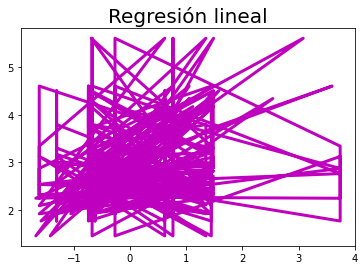

In [ ]:
import matplotlib.pyplot as plt

# Plot outputs
#plt.scatter(X_test, y_test,  color="g")
plt.plot(X_test, y_pred, color="m", linewidth=3)
plt.title("Regresión lineal", fontsize=20)

plt.show()

### **2.8 Tipos de Metricas**

Una vez que haya entrenado un modelo y haya hecho predicciones en el conjunto de prueba, el siguiente paso es saber qué tan bien se ha desempeñado su modelo para hacer predicciones en el conjunto de prueba desconocido. Hay varias métricas para comprobarlo. Sin embargo, el error absoluto medio, el error cuadrático medio y el error cuadrático medio medio son tres de las métricas más comunes.

**Error absoluto medio(Mean Absolute Error MAE)**

El error absoluto medio (MAE) se calcula tomando el promedio del error absoluto obtenido al restar los valores reales de los valores predichos. La ecuación para calcular MAE es:

$$MAE=\frac{\Sigma_{i=1}^{n} |y_i-\hat{y}|}{n} $$

**Error medio cuadrado (Mean Squared Error MSE)**

El error cuadrático medio (MSE) es similar al MAE. Sin embargo, el error para cada registro se eleva al cuadrado en el caso de MSE para castigar los registros de datos con una gran diferencia entre los valores predichos y reales. La ecuación para calcular el error cuadrático medio es la siguiente:

$$MSE=\frac{1}{2} \Sigma_{i=1}^{n} (y_i-\hat{y})^2 $$

**Root Mean Squared Error**

El error cuadrático medio es simplemente la raíz inferior del error cuadrático medio y se puede calcular de la siguiente manera:

$$RMSE=\sqrt{\frac{1}{n} \Sigma_{i=1}^{n} (y_i-\hat{y})^2  } $$

Los métodos utilizados para encontrar el valor de estas métricas están disponibles en la clase `sklearn.metrics`. Los valores predichos y reales deben pasarse a estos métodos, como se muestra en el resultado.

In [ ]:
from sklearn import metrics

print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Mean Absolute Error: 0.7080218832979825
Mean Squared Error: 0.8939195221609609
Root Mean Squared Error: 0.9454731736865731
Coefficient of determination: 0.55


Aquí está la salida. Al observar el error absoluto medio, se puede concluir que, en promedio, hay un error de 0,70 para las predicciones, lo que significa que, en promedio, los valores de propina predichos son 0,70 $ más o menos que los valores de propina reales.

##  **3. Modelo KNN para Regresión**

El KNN significa K-vecinos más cercanos. KNN es un algoritmo de aprendizaje automatico, que se basa en encontrar la distancia euclidiana entre diferentes puntos de datos.

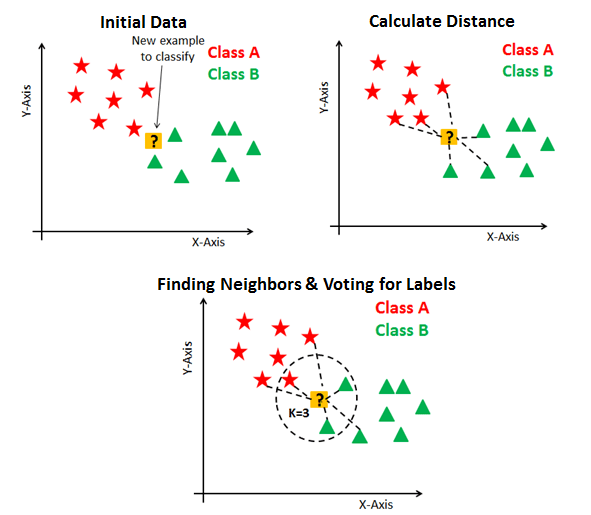

In [ ]:
#@title Algoritmo KNN
from IPython.display import Image
Image("/content/drive/MyDrive/imagenes/knn.png")

**¿Por qué utilizar el algoritmo KNN?**

El algoritmo KNN es particularmente útil cuando:

1. El algoritmo KNN no asume ninguna relación entre las características.
2. Útil para un conjunto de datos donde la localización de datos es importante.
3. Solo tienes que sintonizar el parámetro K, que es el número de vecino más cercano
4. No se necesita entrenamiento, ya que es un algoritmo de aprendizaje perezoso.
5. Sistemas de recomendación y búsqueda de similitudes semánticas entre las principales aplicaciones del algoritmo KNN.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Desventajas del algoritmo KNN**

Las siguientes son las desventajas del algoritmo KNN.
1. Tiene que encontrar el valor óptimo de K, lo cual no es fácil.
2. No apto para datos de dimensiones muy elevadas.

### **3.1. Preparación de datos para problemas de regresión.**

Los algoritmos de aprendizaje automático requieren que los datos estén en un formato determinado antes de que los algoritmos puedan entrenarse con los datos. En esta sección, verá varios pasos de preprocesamiento de datos que debe realizar antes de poder entrenar algoritmos de aprendizaje automático utilizando la biblioteca `Sklearn`.

El conjuntos de datos que vamos a utilizar en esta sección están disponibles de forma predeterminada en la biblioteca de `Seaborn`. Para ver todos los conjuntos de datos, puede usar la función `get_dataset_names ()` como se muestra en el siguiente script:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

Para leer un conjunto de datos en particular en el marco de datos de Pandas, pase el nombre del conjunto de datos al método `load_dataset ()` de la biblioteca Seaborn.

La siguiente secuencia de comandos carga el conjunto de datos *Tips* y muestra sus primeras cinco filas.

In [ ]:
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


En este capítulo, trabajaremos con el conjunto de datos Tips. Usaremos algoritmos de aprendizaje automático para predecir la **Tip** "propina" de un registro en particular, en función de las características restantes, como "factura_total", "sexo", "día", "hora", etc.

### **3.2  División de datos en funciones y etiquetas**

Como primer paso, dividimos los datos en conjuntos de características y etiquetas. Nuestro conjunto de etiquetas consta de valores de la columna "propina", mientras que el conjunto de características consta de valores de las columnas restantes. El siguiente script divide los datos en conjuntos de características y etiquetas.

In [ ]:
X = tips_df.drop(["tip"], axis=1)
y = tips_df["tip"]
#visualizamos los datos
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


Y el siguiente script imprime el conjunto de etiquetas.

In [ ]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

### **3.3. Conversión de datos categóricos en números**

Los algoritmos de aprendizaje automático, en su mayor parte, solo pueden funcionar con números. Por lo tanto, es importante convertir los datos categóricos a un formato numérico.

En este sentido, el primer paso es crear un conjunto de datos de todos los valores numéricos. Para hacerlo, elimine las columnas categóricas del conjunto de datos, como se muestra a continuación.

In [ ]:
#Eliminamos las variables categoricas
numerical = X.drop(["sex" , "smoker" , "day" , "time" ], axis = 1)

El resultado a continuación muestra que el marco de datos "numérico" contiene sólo columnas numéricas.

In [ ]:
#Solo tenemos las variables numéricas
numerical.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


A continuación, debe crear un marco de datos que contenga solo columnas categóricas.

In [ ]:
#Guardamos las variables categorica en una variable que se llama categorica
categorical = X.filter(["sex" , "smoker" , "day" , "time" ])
categorical.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


Uno de los enfoques más comunes para convertir una columna categórica en una numérica es mediante la codificación **one-hot**. En la codificación one-hot, para cada valor único en las columnas originales, se crea una nueva columna. Por ejemplo, para el sexo, se crean dos columnas: Femenino y Masculino. Si la columna de sexo original contenía hombre, se agrega un 1 en la columna Hombre recién creada, y se agrega 0 si es mujer.

Sin embargo, se puede observar que realmente no necesitamos dos columnas. Una sola columna, es decir, Mujer es suficiente, ya que cuando un cliente es mujer, podemos agregar 1 en la columna Mujer, de lo contrario, se puede agregar 1 en esa columna. Por lo tanto, necesitamos N-1 columnas codificadas en caliente para todos los N valores en la columna original.

El siguiente script convierte columnas categóricas en columnas codificadas en un solo uso utilizando el método `pd.get_dummies ()`.

In [ ]:
import pandas as pd
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1,1,0,0,1,1
1,0,1,0,0,1,1
2,0,1,0,0,1,1
3,0,1,0,0,1,1
4,1,1,0,0,1,1


La salida muestra las columnas codificadas **one-hot** recién creadas.

El paso final es unir las columnas numéricas con las columnas codificadas en caliente. Para hacerlo, puede usar la función `concat ()` de la biblioteca Pandas como se muestra a continuación:

In [ ]:
X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


### **3.4. Divida los datos en conjuntos de prueba y entrenamiento**

Después de entrenar un algoritmo de aprendizaje automático, debe evaluarlo para ver qué tan bien funciona con datos invisibles. Por lo tanto, dividimos el conjunto de datos en dos conjuntos, es decir, un conjunto de entrenamiento y un conjunto de prueba. El conjunto de datos se entrena a través del conjunto de entrenamiento y se evalúa en el conjunto de prueba. Para dividir los datos en conjuntos de entrenamiento y prueba, puede usar la función `train_test_split ()` de la biblioteca Sklearn, como se muestra a continuación. El seguimiento El script divide los datos en un conjunto de entrenamiento del 80 por ciento y un conjunto de prueba del 20 por ciento.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### **3.5. Escalado / normalización de datos**

El paso final (opcional) antes de que los datos se pasen a los algoritmos de aprendizaje automático es escalar los datos. Puede ver que algunas columnas del conjunto de datos contienen valores pequeños, mientras que otras contienen valores muy grandes. Es mejor convertir todos los valores a una escala uniforme. Para hacerlo, puede usar la función `StandardScaler ()` del módulo `sklearn.preprocessing`, como se muestra a continuación:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

Hemos convertido los datos a un formato que se puede utilizar para entrenar algoritmos de aprendizaje automático para la regresión desde la biblioteca de Sklearn. Los detalles, incluidas las funcionalidades y el uso de todos los algoritmos de aprendizaje automático.

### **3.6. Implementación del algoritmo KNN con SKlearn**

Con `Sklearn`, es extremadamente fácil implementar la regresión KNN. Para hacerlo, puede usar la clase `KNeighborsRegressor`. El proceso de entrenamiento y prueba es el mismo que el de la regresión lineal. Para el entrenamiento, debe llamar al método `fit ()` y, para las pruebas, debe llamar al método `predict ()`.

El siguiente script muestra el proceso de entrenamiento, prueba y evaluación del algoritmo de regresión KNN para predecir los valores de la columna de sugerencias del conjunto de datos de sugerencias.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
KNN_reg = KNeighborsRegressor(n_neighbors=5)
regressor = KNN_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

### **3.7 Tipos de Metricas**

Una vez que haya entrenado un modelo y haya hecho predicciones en el conjunto de prueba, el siguiente paso es saber qué tan bien se ha desempeñado su modelo para hacer predicciones en el conjunto de prueba desconocido. Hay varias métricas para comprobarlo. Sin embargo, el error absoluto medio, el error cuadrático medio y el error cuadrático medio medio son tres de las métricas más comunes.

**Error absoluto medio(Mean Absolute Error MAE)**

El error absoluto medio (MAE) se calcula tomando el promedio del error absoluto obtenido al restar los valores reales de los valores predichos. La ecuación para calcular MAE es:

$$MAE=\frac{\Sigma_{i=1}^{n} |y_i-\hat{y}|}{n} $$

**Error medio cuadrado (Mean Squared Error MSE)**

El error cuadrático medio (MSE) es similar al MAE. Sin embargo, el error para cada registro se eleva al cuadrado en el caso de MSE para castigar los registros de datos con una gran diferencia entre los valores predichos y reales. La ecuación para calcular el error cuadrático medio es la siguiente:

$$MSE=\frac{1}{2} \Sigma_{i=1}^{n} (y_i-\hat{y})^2 $$

**Root Mean Squared Error**

El error cuadrático medio es simplemente la raíz inferior del error cuadrático medio y se puede calcular de la siguiente manera:

$$RMSE=\sqrt{\frac{1}{n} \Sigma_{i=1}^{n} (y_i-\hat{y})^2  } $$

Los métodos utilizados para encontrar el valor de estas métricas están disponibles en la clase `sklearn.metrics`. Los valores predichos y reales deben pasarse a estos métodos, como se muestra en el resultado.

#### **3.7.1 CalculO de Metrica**

In [ ]:
# The mean squared error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7966122448979591
Mean Squared Error: 1.1536601632653058
Root Mean Squared Error: 1.0740857336662217


Aquí está la salida. Al observar el error absoluto medio, se puede concluir que, en promedio, hay un error de 0,70 para las predicciones, lo que significa que, en promedio, los valores de propina predichos son 0,70 $ más o menos que los valores de propina reales.

### **3.8 Calculo de K-vecinos contra RMSE**

**Elegir un valor K**

Sigamos adelante y usemos el método del codo para elegir un buen valor K. Básicamente, comprobaremos la tasa de error de $k = 1$ para decir $k = 20$. Para cada valor de $k$ llamaremos clasificador KNN y luego elegiremos el valor de $k$ que tenga la menor tasa de error.

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #para almacenar valores rmse para diferentes k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #hacer predicciones en el equipo de prueba
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.3148764200486676
RMSE value for k=  2 is: 1.230593228438037
RMSE value for k=  3 is: 1.0443771266963098
RMSE value for k=  4 is: 1.0601847523821843
RMSE value for k=  5 is: 1.0740857336662217
RMSE value for k=  6 is: 1.0708658575224332
RMSE value for k=  7 is: 1.0184186523414136
RMSE value for k=  8 is: 0.9910711550836173
RMSE value for k=  9 is: 0.9849949833161458
RMSE value for k=  10 is: 0.9382998846154612
RMSE value for k=  11 is: 0.9699713443385405
RMSE value for k=  12 is: 0.9602057499304752
RMSE value for k=  13 is: 0.971298857631808
RMSE value for k=  14 is: 0.9774167763901161
RMSE value for k=  15 is: 0.9790011384186145
RMSE value for k=  16 is: 0.9638241041284347
RMSE value for k=  17 is: 0.9710047162022872
RMSE value for k=  18 is: 0.9880393303492307
RMSE value for k=  19 is: 0.980110127978323
RMSE value for k=  20 is: 0.98540073946945


Text(0, 0.5, 'Error Rate')

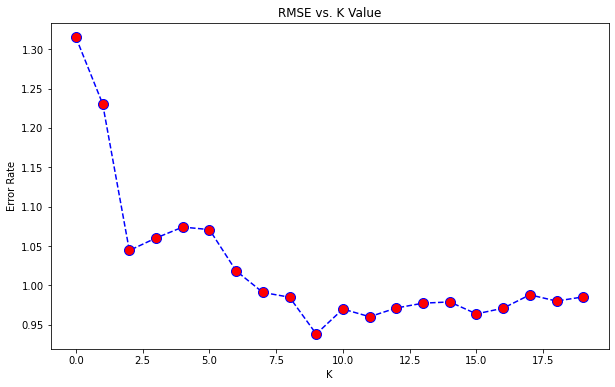

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(rmse_val ,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title('RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

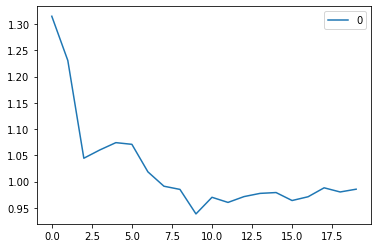

In [ ]:
#graficar los valores rmse contra k valores
curve = pd.DataFrame(rmse_val) #elbow curve 

curve.plot()

Como comentamos, cuando tomamos $k = 1$, obtenemos un valor **RMSE** relativamente alto. El valor de RMSE disminuye a medida que aumentamos el valor de $k$. En $k = 8$, el RMSE es aproximadamente 0.9910 y se dispara al aumentar aún más el valor de $k$. Podemos decir con seguridad que $k = 10$ nos dará el mejor resultado en este caso.

### **3.9 Implementación de GridsearchCV**
Para decidir el valor de k, trazar la curva del codo cada vez es un proceso engorroso y tedioso. Simplemente puede usar gridsearch para encontrar el mejor valor.

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

## **4. Random Forest Regresión**

El bosque aleatorio es un algoritmo basado en árboles que convierte características en nodos de árbol y luego usa la pérdida de entropía para hacer predicciones.

**¿Por qué utilizar algoritmos de bosque aleatorio?**

Los algoritmos de bosque aleatorio son particularmente útiles cuando:

1. Tiene muchos datos faltantes o un conjunto de datos desequilibrado.
2. Con una gran cantidad de árboles, puede evitar el sobreajuste durante el entrenamiento. El sobreajuste ocurre cuando los modelos de aprendizaje automático funcionan mejor en el conjunto de entrenamiento pero en el conjunto de prueba.
3. El algoritmo de bosque aleatorio se puede utilizar cuando tiene datos dimensionales muy altos.
4. A través de la validación cruzada, el algoritmo de bosque aleatorio puede devolver mayor acc
5. El algoritmo de bosque aleatorio puede resolver tanto la clasificación como la regresión y encuentra su aplicación en una variedad de tareas que van desde la detección de fraude con tarjetas de crédito, la predicción del mercado de valores y la búsqueda de transacciones fraudulentas en línea.

**Desventajas de los algoritmos de bosque aleatorio**

Hay dos desventajas principales de los algoritmos de bosque aleatorio:

1. El uso de una gran cantidad de árboles puede ralentizar el algoritmo.
2. El algoritmo de bosque aleatorio es un algoritmo predictivo, que solo puede predecir el futuro y no puede explicar lo que sucedió en el pasado utilizando el conjunto de datos.

### **4.1. Preparación de datos para problemas de regresión.**

Los algoritmos de aprendizaje automático requieren que los datos estén en un formato determinado antes de que los algoritmos puedan entrenarse con los datos. En esta sección, verá varios pasos de preprocesamiento de datos que debe realizar antes de poder entrenar algoritmos de aprendizaje automático utilizando la biblioteca `Sklearn`.

El conjuntos de datos que vamos a utilizar en esta sección están disponibles de forma predeterminada en la biblioteca de `Seaborn`. Para ver todos los conjuntos de datos, puede usar la función `get_dataset_names ()` como se muestra en el siguiente script:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.get_dataset_names()

Para leer un conjunto de datos en particular en el marco de datos de Pandas, pase el nombre del conjunto de datos al método `load_dataset ()` de la biblioteca Seaborn.

La siguiente secuencia de comandos carga el conjunto de datos *Tips* y muestra sus primeras cinco filas.

In [ ]:
tips_df = sns.load_dataset("tips")
tips_df.head()

En este capítulo, trabajaremos con el conjunto de datos Tips. Usaremos algoritmos de aprendizaje automático para predecir la **Tip** "propina" de un registro en particular, en función de las características restantes, como "factura_total", "sexo", "día", "hora", etc.

### **4.2  División de datos en funciones y etiquetas**

Como primer paso, dividimos los datos en conjuntos de características y etiquetas. Nuestro conjunto de etiquetas consta de valores de la columna "propina", mientras que el conjunto de características consta de valores de las columnas restantes. El siguiente script divide los datos en conjuntos de características y etiquetas.

In [ ]:
X = tips_df.drop(["tip"], axis=1)
y = tips_df["tip"]
#visualizamos los datos
X.head()

Y el siguiente script imprime el conjunto de etiquetas.

In [ ]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

### **4.3. Conversión de datos categóricos en números**

Los algoritmos de aprendizaje automático, en su mayor parte, solo pueden funcionar con números. Por lo tanto, es importante convertir los datos categóricos a un formato numérico.

En este sentido, el primer paso es crear un conjunto de datos de todos los valores numéricos. Para hacerlo, elimine las columnas categóricas del conjunto de datos, como se muestra a continuación.

In [ ]:
#Eliminamos las variables categoricas
numerical = X.drop(["sex" , "smoker" , "day" , "time" ], axis = 1)

El resultado a continuación muestra que el marco de datos "numérico" contiene sólo columnas numéricas.

In [ ]:
#Solo tenemos las variables numéricas
numerical.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


A continuación, debe crear un marco de datos que contenga solo columnas categóricas.

In [ ]:
#Guardamos las variables categorica en una variable que se llama categorica
categorical = X.filter(["sex" , "smoker" , "day" , "time" ])
categorical.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


Uno de los enfoques más comunes para convertir una columna categórica en una numérica es mediante la codificación **one-hot**. En la codificación one-hot, para cada valor único en las columnas originales, se crea una nueva columna. Por ejemplo, para el sexo, se crean dos columnas: Femenino y Masculino. Si la columna de sexo original contenía hombre, se agrega un 1 en la columna Hombre recién creada, y se agrega 0 si es mujer.

Sin embargo, se puede observar que realmente no necesitamos dos columnas. Una sola columna, es decir, Mujer es suficiente, ya que cuando un cliente es mujer, podemos agregar 1 en la columna Mujer, de lo contrario, se puede agregar 1 en esa columna. Por lo tanto, necesitamos N-1 columnas codificadas en caliente para todos los N valores en la columna original.

El siguiente script convierte columnas categóricas en columnas codificadas en un solo uso utilizando el método `pd.get_dummies ()`.

In [ ]:
import pandas as pd
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1,1,0,0,1,1
1,0,1,0,0,1,1
2,0,1,0,0,1,1
3,0,1,0,0,1,1
4,1,1,0,0,1,1


La salida muestra las columnas codificadas **one-hot** recién creadas.

El paso final es unir las columnas numéricas con las columnas codificadas en caliente. Para hacerlo, puede usar la función `concat ()` de la biblioteca Pandas como se muestra a continuación:

In [ ]:
X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


### **4.4. Divida los datos en conjuntos de prueba y entrenamiento**

Después de entrenar un algoritmo de aprendizaje automático, debe evaluarlo para ver qué tan bien funciona con datos invisibles. Por lo tanto, dividimos el conjunto de datos en dos conjuntos, es decir, un conjunto de entrenamiento y un conjunto de prueba. El conjunto de datos se entrena a través del conjunto de entrenamiento y se evalúa en el conjunto de prueba. Para dividir los datos en conjuntos de entrenamiento y prueba, puede usar la función `train_test_split ()` de la biblioteca Sklearn, como se muestra a continuación. El seguimiento El script divide los datos en un conjunto de entrenamiento del 80 por ciento y un conjunto de prueba del 20 por ciento.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### **4.5. Escalado / normalización de datos**

El paso final (opcional) antes de que los datos se pasen a los algoritmos de aprendizaje automático es escalar los datos. Puede ver que algunas columnas del conjunto de datos contienen valores pequeños, mientras que otras contienen valores muy grandes. Es mejor convertir todos los valores a una escala uniforme. Para hacerlo, puede usar la función `StandardScaler ()` del módulo `sklearn.preprocessing`, como se muestra a continuación:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

Hemos convertido los datos a un formato que se puede utilizar para entrenar algoritmos de aprendizaje automático para la regresión desde la biblioteca de Sklearn. Los detalles, incluidas las funcionalidades y el uso de todos los algoritmos de aprendizaje automático.

### **4.6 Implementación de un regresor de bosque aleatorio mediante Sklearn**

La clase `RandomForestRegressor` del módulo Sklearn.ensemble se puede usar para implementar algoritmos de regresores forestales aleatorios, como se muestra a continuación.

In [ ]:
# training and testing the random forest
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)
regressor = rf_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Mean Absolute Error: 0.7054065306122449
Mean Squared Error: 0.8045782841306138
Root Mean Squared Error: 0.8969828783932354


### **4.7 Tipos de Metricas**

Una vez que haya entrenado un modelo y haya hecho predicciones en el conjunto de prueba, el siguiente paso es saber qué tan bien se ha desempeñado su modelo para hacer predicciones en el conjunto de prueba desconocido. Hay varias métricas para comprobarlo. Sin embargo, el error absoluto medio, el error cuadrático medio y el error cuadrático medio medio son tres de las métricas más comunes.

**Error absoluto medio(Mean Absolute Error MAE)**

El error absoluto medio (MAE) se calcula tomando el promedio del error absoluto obtenido al restar los valores reales de los valores predichos. La ecuación para calcular MAE es:

$$MAE=\frac{\Sigma_{i=1}^{n} |y_i-\hat{y}|}{n} $$

**Error medio cuadrado (Mean Squared Error MSE)**

El error cuadrático medio (MSE) es similar al MAE. Sin embargo, el error para cada registro se eleva al cuadrado en el caso de MSE para castigar los registros de datos con una gran diferencia entre los valores predichos y reales. La ecuación para calcular el error cuadrático medio es la siguiente:

$$MSE=\frac{1}{2} \Sigma_{i=1}^{n} (y_i-\hat{y})^2 $$

**Root Mean Squared Error**

El error cuadrático medio es simplemente la raíz inferior del error cuadrático medio y se puede calcular de la siguiente manera:

$$RMSE=\sqrt{\frac{1}{n} \Sigma_{i=1}^{n} (y_i-\hat{y})^2  } $$

Los métodos utilizados para encontrar el valor de estas métricas están disponibles en la clase `sklearn.metrics`. Los valores predichos y reales deben pasarse a estos métodos, como se muestra en el resultado.

#### **4.7.1Cálculo de Metrica**

In [ ]:
# evaluating algorithm performance
from sklearn import metrics

print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

El valor de error absoluto medio de 0,70 muestra que el bosque aleatorio funciona mejor que la regresión lineal y KNN para predecir la punta en el conjunto de datos Tips.

## **5. Support Vector Regresión**

La máquina de vectores de soporte es la clasificación y los algoritmos de regresión, que minimizan el error entre las predicciones reales y las predicciones al maximizar la distancia entre hiperplanos que contienen datos para varios registros.

**¿Por qué utilizar algoritmos SVR?**

La regresión de vectores de soporte es una variante de la máquina de vectores de soporte (SVM) para la regresión. SVM tiene los siguientes usos.

1. Se puede utilizar para realizar regresiones o clasificaciones con alta dimensión.
2. Con el truco del kernel, SVM es capaz de aplicar regresiones y clasificaciones de conjuntos de datos no lineales.
3. Los algoritmos SVM se utilizan comúnmente para la clasificación ordinal o regresión, por eso se conocen comúnmente como algoritmos de clasificación.

**Desventajas de los algoritmos SVR**

Hay tres desventajas principales de los algoritmos SVR:

1. Gran cantidad de parámetros a optimizar para obtener el mejor rendimiento.
2. La formación puede llevar mucho tiempo en grandes conjuntos de datos.
3. Produce malos resultados si el número de características es mayor que el número de re un conjunto de datos.

### **5.1. Preparación de datos para problemas de regresión.**

Los algoritmos de aprendizaje automático requieren que los datos estén en un formato determinado antes de que los algoritmos puedan entrenarse con los datos. En esta sección, verá varios pasos de preprocesamiento de datos que debe realizar antes de poder entrenar algoritmos de aprendizaje automático utilizando la biblioteca `Sklearn`.

El conjuntos de datos que vamos a utilizar en esta sección están disponibles de forma predeterminada en la biblioteca de `Seaborn`. Para ver todos los conjuntos de datos, puede usar la función `get_dataset_names ()` como se muestra en el siguiente script:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.get_dataset_names()

Para leer un conjunto de datos en particular en el marco de datos de Pandas, pase el nombre del conjunto de datos al método `load_dataset ()` de la biblioteca Seaborn.

La siguiente secuencia de comandos carga el conjunto de datos *Tips* y muestra sus primeras cinco filas.

In [ ]:
tips_df = sns.load_dataset("tips")
tips_df.head()

En este capítulo, trabajaremos con el conjunto de datos Tips. Usaremos algoritmos de aprendizaje automático para predecir la **Tip** "propina" de un registro en particular, en función de las características restantes, como "factura_total", "sexo", "día", "hora", etc.

### **5.2  División de datos en funciones y etiquetas**

Como primer paso, dividimos los datos en conjuntos de características y etiquetas. Nuestro conjunto de etiquetas consta de valores de la columna "propina", mientras que el conjunto de características consta de valores de las columnas restantes. El siguiente script divide los datos en conjuntos de características y etiquetas.

In [ ]:
X = tips_df.drop(["tip"], axis=1)
y = tips_df["tip"]
#visualizamos los datos
X.head()

Y el siguiente script imprime el conjunto de etiquetas.

In [ ]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

### **5.3. Conversión de datos categóricos en números**

Los algoritmos de aprendizaje automático, en su mayor parte, solo pueden funcionar con números. Por lo tanto, es importante convertir los datos categóricos a un formato numérico.

En este sentido, el primer paso es crear un conjunto de datos de todos los valores numéricos. Para hacerlo, elimine las columnas categóricas del conjunto de datos, como se muestra a continuación.

In [ ]:
#Eliminamos las variables categoricas
numerical = X.drop(["sex" , "smoker" , "day" , "time" ], axis = 1)

El resultado a continuación muestra que el marco de datos "numérico" contiene sólo columnas numéricas.

In [ ]:
#Solo tenemos las variables numéricas
numerical.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


A continuación, debe crear un marco de datos que contenga solo columnas categóricas.

In [ ]:
#Guardamos las variables categorica en una variable que se llama categorica
categorical = X.filter(["sex" , "smoker" , "day" , "time" ])
categorical.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


Uno de los enfoques más comunes para convertir una columna categórica en una numérica es mediante la codificación **one-hot**. En la codificación one-hot, para cada valor único en las columnas originales, se crea una nueva columna. Por ejemplo, para el sexo, se crean dos columnas: Femenino y Masculino. Si la columna de sexo original contenía hombre, se agrega un 1 en la columna Hombre recién creada, y se agrega 0 si es mujer.

Sin embargo, se puede observar que realmente no necesitamos dos columnas. Una sola columna, es decir, Mujer es suficiente, ya que cuando un cliente es mujer, podemos agregar 1 en la columna Mujer, de lo contrario, se puede agregar 1 en esa columna. Por lo tanto, necesitamos N-1 columnas codificadas en caliente para todos los N valores en la columna original.

El siguiente script convierte columnas categóricas en columnas codificadas en un solo uso utilizando el método `pd.get_dummies ()`.

In [ ]:
import pandas as pd
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1,1,0,0,1,1
1,0,1,0,0,1,1
2,0,1,0,0,1,1
3,0,1,0,0,1,1
4,1,1,0,0,1,1


La salida muestra las columnas codificadas **one-hot** recién creadas.

El paso final es unir las columnas numéricas con las columnas codificadas en caliente. Para hacerlo, puede usar la función `concat ()` de la biblioteca Pandas como se muestra a continuación:

In [ ]:
X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


### **5.4. Divida los datos en conjuntos de prueba y entrenamiento**

Después de entrenar un algoritmo de aprendizaje automático, debe evaluarlo para ver qué tan bien funciona con datos invisibles. Por lo tanto, dividimos el conjunto de datos en dos conjuntos, es decir, un conjunto de entrenamiento y un conjunto de prueba. El conjunto de datos se entrena a través del conjunto de entrenamiento y se evalúa en el conjunto de prueba. Para dividir los datos en conjuntos de entrenamiento y prueba, puede usar la función `train_test_split ()` de la biblioteca Sklearn, como se muestra a continuación. El seguimiento El script divide los datos en un conjunto de entrenamiento del 80 por ciento y un conjunto de prueba del 20 por ciento.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### **5.5. Escalado / normalización de datos**

El paso final (opcional) antes de que los datos se pasen a los algoritmos de aprendizaje automático es escalar los datos. Puede ver que algunas columnas del conjunto de datos contienen valores pequeños, mientras que otras contienen valores muy grandes. Es mejor convertir todos los valores a una escala uniforme. Para hacerlo, puede usar la función `StandardScaler ()` del módulo `sklearn.preprocessing`, como se muestra a continuación:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

Hemos convertido los datos a un formato que se puede utilizar para entrenar algoritmos de aprendizaje automático para la regresión desde la biblioteca de Sklearn. Los detalles, incluidas las funcionalidades y el uso de todos los algoritmos de aprendizaje automático.

### **5.6 Implementación de SVR con Sklearn**

Con la biblioteca Sklearn, puede usar la clase SVM para implementar algoritmos de regresión vectorial de soporte, como se muestra a continuación.

In [ ]:
# training and testing the SVM

from sklearn import svm
svm_reg = svm.SVR()

regressor = svm_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Mean Absolute Error: 0.7362521512772694
Mean Squared Error: 0.9684825097223093
Root Mean Squared Error: 0.9841150896731079


### **5.7 Tipos de Metricas**

Una vez que haya entrenado un modelo y haya hecho predicciones en el conjunto de prueba, el siguiente paso es saber qué tan bien se ha desempeñado su modelo para hacer predicciones en el conjunto de prueba desconocido. Hay varias métricas para comprobarlo. Sin embargo, el error absoluto medio, el error cuadrático medio y el error cuadrático medio medio son tres de las métricas más comunes.

**Error absoluto medio(Mean Absolute Error MAE)**

El error absoluto medio (MAE) se calcula tomando el promedio del error absoluto obtenido al restar los valores reales de los valores predichos. La ecuación para calcular MAE es:

$$MAE=\frac{\Sigma_{i=1}^{n} |y_i-\hat{y}|}{n} $$

**Error medio cuadrado (Mean Squared Error MSE)**

El error cuadrático medio (MSE) es similar al MAE. Sin embargo, el error para cada registro se eleva al cuadrado en el caso de MSE para castigar los registros de datos con una gran diferencia entre los valores predichos y reales. La ecuación para calcular el error cuadrático medio es la siguiente:

$$MSE=\frac{1}{2} \Sigma_{i=1}^{n} (y_i-\hat{y})^2 $$

**Root Mean Squared Error**

El error cuadrático medio es simplemente la raíz inferior del error cuadrático medio y se puede calcular de la siguiente manera:

$$RMSE=\sqrt{\frac{1}{n} \Sigma_{i=1}^{n} (y_i-\hat{y})^2  } $$

Los métodos utilizados para encontrar el valor de estas métricas están disponibles en la clase `sklearn.metrics`. Los valores predichos y reales deben pasarse a estos métodos, como se muestra en el resultado.

#### **5.7.1 Cálculo de Metrica**

In [ ]:
from sklearn import metrics

print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

**¿Qué modelo usar?**

Los resultados obtenidos de las secciones 1 a 5 muestran que los algoritmos del regresor de bosque aleatorio dan como resultado los valores mínimos de MAE, MSE y RMSE. El algoritmo que elija utilizar depende totalmente de su conjunto de datos y métricas de evaluación. Algunos algoritmos funcionan mejor en un conjunto de datos, mientras que otros algoritmos funcionan mejor en el otro conjunto de datos. Es mejor que uses todos los algoritmos para ver cuál da los mejores resultados. Sin embargo, si tiene opciones limitadas, es mejor comenzar con algoritmos de aprendizaje por conjuntos como Random Forest. Dan el mejor resultado.

##  **6. K Fold Cross-Validation**

Anteriormente, dividimos los datos en un conjunto de entrenamiento del 80 por ciento y un conjunto de prueba del 20 por ciento. Sin embargo, significa que solo el 20 por ciento de los datos se usa para pruebas y que el 20 por ciento de los datos nunca se usa para entrenamiento.

Para obtener resultados más estables, se recomienda que todas las partes del conjunto de datos se utilicen al menos una vez para el entrenamiento y una vez para las pruebas. Para ello, se puede utilizar la técnica de validación cruzada de K-Fold. Con la validación cruzada de K-fold, los datos se dividen en K partes. Los experimentos también se realizan para K partes. En cada experimento, las partes K-1 se utilizan para el entrenamiento y la parte Kth se utiliza para las pruebas.

Por ejemplo, en la validación cruzada de 5 veces, los datos se dividen en cinco partes iguales, por ejemplo, K1, K2, K3, K4 y K5. En la primera iteración, K1 – K4 se usan para entrenamiento, mientras que K5 se usa para pruebas. En la segunda prueba, K1, K2, K3 y K5 se utilizan para el entrenamiento y K4 para las pruebas. De esta manera, cada parte se usa al menos una vez para probar y una vez para entrenamiento.

Puede usar la función `cross_val_score ()` de `sklearn`. módulo model_selection para realizar la validación cruzada como se muestra a continuación:

In [ ]:
from sklearn.model_selection import cross_val_score
print (cross_val_score(regressor, X, y, cv=5, scoring ="neg_mean_absolute_error" ))

[-0.66386205 -0.57007269 -0.63598762 -0.96960743 -0.87391702]


La salida muestra el valor absoluto medio para cada uno de los K pliegues.

## **7. Hacer predicciones en un solo registro**

En las secciones anteriores, vio cómo hacer predicciones en un conjunto de prueba completo. En esta sección, verá cómo hacer una predicción utilizando un solo registro como entrada.

Escojamos el registro número 100 de nuestro conjunto de datos.

In [ ]:
tips_df.loc[100]

total_bill     11.35
tip              2.5
sex           Female
smoker           Yes
day              Fri
time          Dinner
size               2
Name: 100, dtype: object

El resultado muestra que el valor de la propina en el registro número 100 de nuestro conjunto de datos es 2,5.

Intentaremos predecir el valor de la punta del registro 100 utilizando el algoritmo regresor de bosque aleatorio y veremos qué resultado obtenemos. 

Tenga en cuenta que debe escalar su registro único antes de que se pueda usar como entrada para su algoritmo de aprendizaje automático.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)
regressor = rf_reg.fit(X_train, y_train)

single_record = sc.transform (X.values[100].reshape(1, -1))
predicted_tip = regressor.predict(single_record)
print (predicted_tip)

[2.2609]


El valor previsto de la propina es 2,26, que está bastante cerca de 2,5, es decir, el valor real.